# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

1. Temperature has clear correlation with latitude, weather significantly warmer when it reaches equator (0 Deg. Latitude). The southern hemisphere tends to be warmer than the northern hemisphere
2. Wind speed tends to generally be betweeen 0 and 15 mph regardless of latitude
3. There is no strong relationship between latitude and humidity. however there is a slightly larger cluster of northern hemisphere cities with high humidity (above 60% humidity)

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Import citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
latt_lngts = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
latt_lngts = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in latt_lngts:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
        

638

In [54]:
### Perform API Calls
#* Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).

# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 25)

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
                
        # Extract out max temp humidity and cloudiness
        city_latt = city_weather["coord"]["lat"]
        city_lngt = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_latt,
            "Lng" :city_lngt,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # print that data loading complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | chitrakonda
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | anse-bertrand
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | svetlogorsk
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | maceio
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | le port
Processing Record 22 of Set 1 | bollnas
Processing Record 23 of Set 1 | upernavik


Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | tutoia
Processing Record 40 of Set 4 | lianzhou
Processing Record 41 of Set 4 | aden
Processing Record 42 of Set 4 | cabedelo
Processing Record 43 of Set 4 | north platte
Processing Record 44 of Set 4 | alotau
City not found. Skipping ...
Processing Record 45 of Set 4 | dolbeau
City not found. Skipping ...
Processing Record 46 of Set 4 | grand-santi
Processing Record 47 of Set 4 | nsanje
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | hit
Processing Record 0 of Set 5 | chulman
Processing Record 1 of Set 5 | seoul
Processing Record 2 of Set 5 | hanmer springs
Processing Record 3 of Set 5 | grants
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | shu
Processing Record 6 of Set 5 | eyl
Processing Record 7 of Set 5 | wana
Processing Record 8 of Set 5 | cody
Processing Record 9 of Set 5 | dingle
Processing Record 10 of Set 5 | north bend
Processing Record 11 of Set 5 |

Processing Record 23 of Set 8 | akcaabat
Processing Record 24 of Set 8 | lagoa
Processing Record 25 of Set 8 | gravelbourg
Processing Record 26 of Set 8 | ilulissat
Processing Record 27 of Set 8 | salinas
Processing Record 28 of Set 8 | gerash
Processing Record 29 of Set 8 | tambul
City not found. Skipping ...
Processing Record 30 of Set 8 | lasa
Processing Record 31 of Set 8 | oriximina
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | praia da vitoria
Processing Record 34 of Set 8 | kaeo
Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | camacha
Processing Record 37 of Set 8 | bandar-e lengeh
Processing Record 38 of Set 8 | gazni
City not found. Skipping ...
Processing Record 39 of Set 8 | vila franca do campo
Processing Record 40 of Set 8 | samusu
City not found. Skipping ...
Processing Record 41 of Set 8 | puerto penasco
Processing Record 42 of Set 8 | sieradz
Processing Record 43 of Set 8 | sarny
Processing Record 44 of Set 8 | jackso

Processing Record 7 of Set 12 | hokitika
Processing Record 8 of Set 12 | umm kaddadah
Processing Record 9 of Set 12 | yumen
Processing Record 10 of Set 12 | zhangjiakou
Processing Record 11 of Set 12 | isangel
Processing Record 12 of Set 12 | babanusah
City not found. Skipping ...
Processing Record 13 of Set 12 | bengkulu
Processing Record 14 of Set 12 | half moon bay
Processing Record 15 of Set 12 | pithora
Processing Record 16 of Set 12 | meulaboh
Processing Record 17 of Set 12 | avera
Processing Record 18 of Set 12 | siutu
City not found. Skipping ...
Processing Record 19 of Set 12 | ituni
City not found. Skipping ...
Processing Record 20 of Set 12 | manjacaze
Processing Record 21 of Set 12 | horadiz
Processing Record 22 of Set 12 | tambura
Processing Record 23 of Set 12 | chagda
City not found. Skipping ...
Processing Record 24 of Set 12 | cap-aux-meules
Processing Record 25 of Set 12 | bangkalan
Processing Record 26 of Set 12 | verkhovazhye
Processing Record 27 of Set 12 | amapa
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)

# save to csv file
city_data_df.to_csv("../output_data/city_weather_data.csv", index=False)
city_data_df = pd.read_csv("../output_data/city_weather_data.csv")

# Display the city weather data frame
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,busselton,-33.6500,115.3333,59.94,69,94,16.73,AU,1655085622
1,bluff,-46.6000,168.3333,45.81,71,100,29.30,NZ,1655085779
2,ushuaia,-54.8000,-68.3000,40.66,93,75,2.30,AR,1655085780
3,east london,-33.0153,27.9116,75.51,30,100,11.18,ZA,1655085780
4,hobart,-42.8794,147.3294,53.06,63,20,9.22,AU,1655085712
5,castro,-24.7911,-50.0119,38.46,69,0,4.38,BR,1655085781
6,chitrakonda,18.1167,82.0833,81.82,67,97,2.48,IN,1655085781
7,punta arenas,-53.1500,-70.9167,44.11,87,100,7.94,CL,1655085721
8,bathsheba,13.2167,-59.5167,81.21,78,20,21.85,BB,1655085781
9,hilo,19.7297,-155.0900,87.28,80,100,8.05,US,1655085782


In [56]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,19.564345,14.384015,66.545923,70.656794,56.351916,7.962317,1.655086e+09
std,33.271334,88.270608,14.664054,21.164996,41.514793,5.899385,8.705396e+01
min,-54.800000,-179.166700,24.980000,1.000000,0.000000,0.000000,1.655086e+09
25%,-8.361900,-61.688325,55.185000,59.000000,9.000000,3.565000,1.655086e+09
50%,22.912100,20.087500,68.350000,75.000000,69.500000,6.385000,1.655086e+09
75%,47.997050,80.998275,78.525000,87.000000,100.000000,10.567500,1.655086e+09
max,78.218600,179.316700,110.620000,100.000000,100.000000,33.380000,1.655086e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
#check if there are any cities with >100% humidity
badHumidOver_df = city_data_df[(city_data_df['Humidity'] > 100)]
badHumidOver_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date


In [58]:
badHumidOver_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#  Get the indices of cities that have humidity over 100%.
badHumidOver_df_100=badHumidOver_df.index
badHumidOver_df_100


Int64Index([], dtype='int64')

In [60]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index which is badHumidOver_df_100.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(badHumidOver_df_100, inplace=False)
clean_city_data = clean_city_data[["City","Country", "Lat", "Max Temp", "Humidity", "Cloudiness", "Windspeed", "Date"]]
clean_city_data.head()

,City,Country,Lat,Max Temp,Humidity,Cloudiness,Windspeed,Date
0,busselton,AU,-33.6500,59.94,69,94,16.73,1655085622
1,bluff,NZ,-46.6000,45.81,71,100,29.30,1655085779
2,ushuaia,AR,-54.8000,40.66,93,75,2.30,1655085780
3,east london,ZA,-33.0153,75.51,30,100,11.18,1655085780
4,hobart,AU,-42.8794,53.06,63,20,9.22,1655085712


In [61]:
clean_city_data.describe()

,Lat,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,19.564345,66.545923,70.656794,56.351916,7.962317,1.655086e+09
std,33.271334,14.664054,21.164996,41.514793,5.899385,8.705396e+01
min,-54.800000,24.980000,1.000000,0.000000,0.000000,1.655086e+09
25%,-8.361900,55.185000,59.000000,9.000000,3.565000,1.655086e+09
50%,22.912100,68.350000,75.000000,69.500000,6.385000,1.655086e+09
75%,47.997050,78.525000,87.000000,100.000000,10.567500,1.655086e+09
max,78.218600,110.620000,100.000000,100.000000,33.380000,1.655086e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

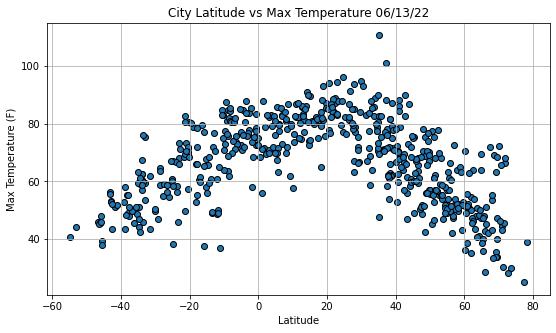

In [62]:
now = datetime.now()
date_now = now.strftime("%m/%d/%y")

# Create a scatter plot for latitude vs max temperature.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

fig1, ax1 = plt.subplots(figsize=(9,5))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=1)
plt.title(f"City Latitude vs Max Temperature {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_vs_max_temp.png", bbox_inches="tight")
plt.show()


## Latitude vs. Humidity Plot

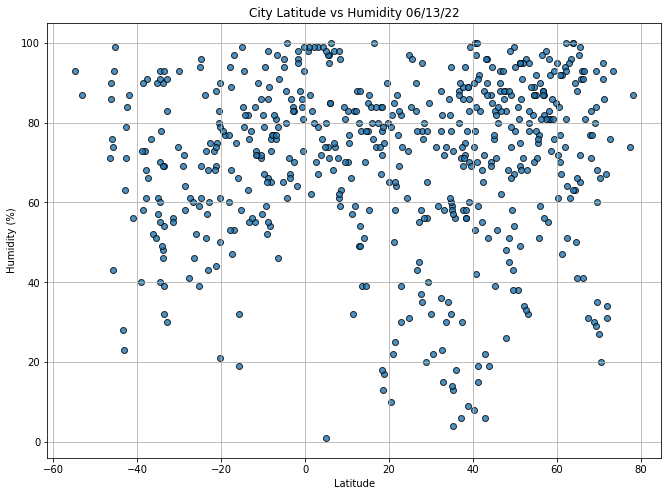

In [63]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date_now}")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

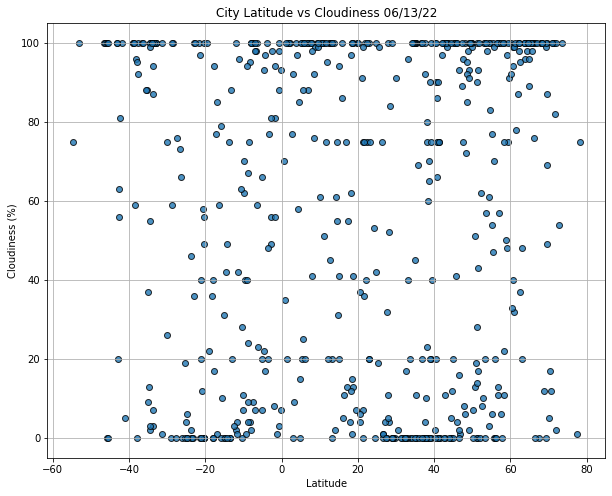

In [64]:
# Create a scatter plot for latitude vs cloudiness.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {date_now}")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

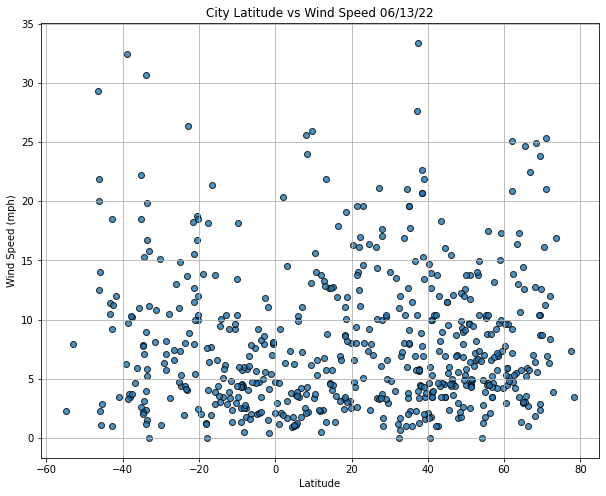

In [65]:
# Create a scatter plot for latitude vs wind speed.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Windspeed"]

fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed {date_now}")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [66]:
# Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")


In [67]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.525906439722615
The correlation between both factors is -0.73


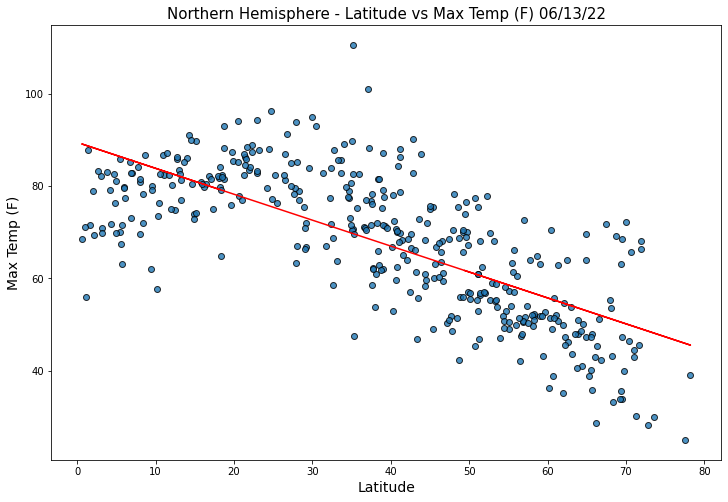

In [68]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("../output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5178188648152099
The correlation between both factors is 0.72


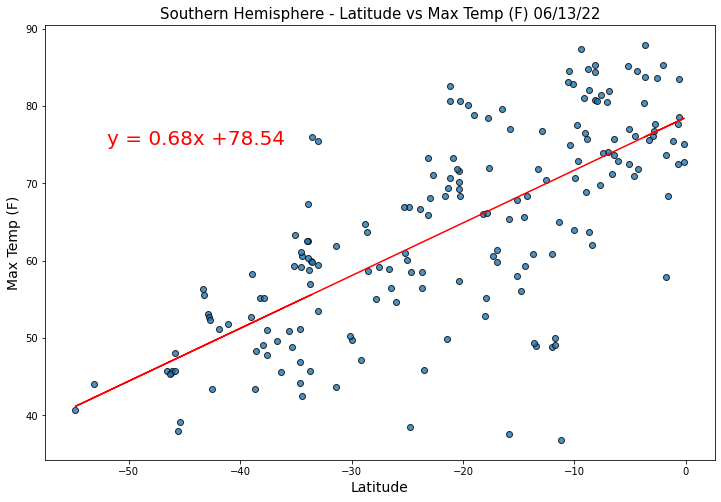

In [69]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df["Lat"]
y_values = southern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("../output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002062191801120069
The correlation between both factors is 0.05


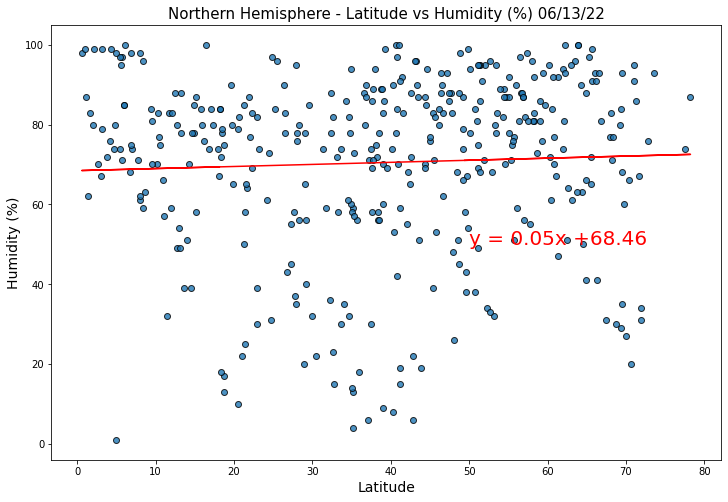

In [70]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("../output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0475471644542153
The correlation between both factors is 0.22


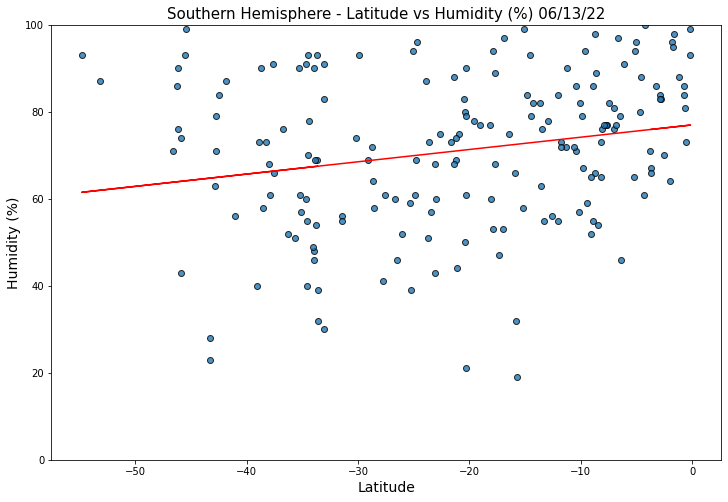

In [71]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("../output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0030570285964433242
The correlation between both factors is 0.06


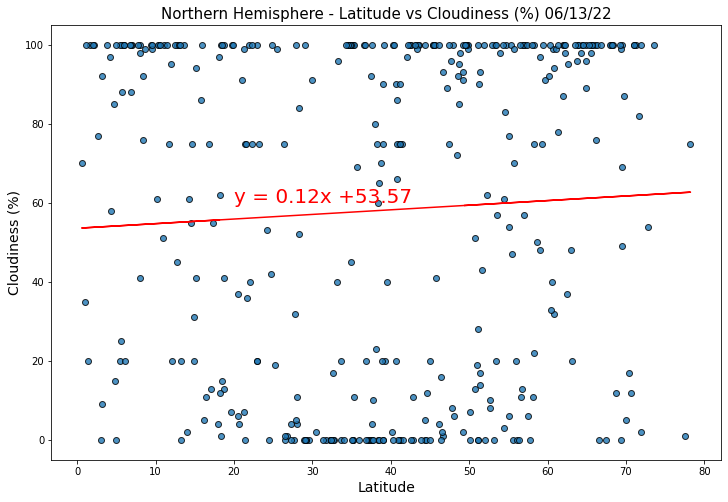

In [72]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("../output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03942958151636155
The correlation between both factors is -0.2


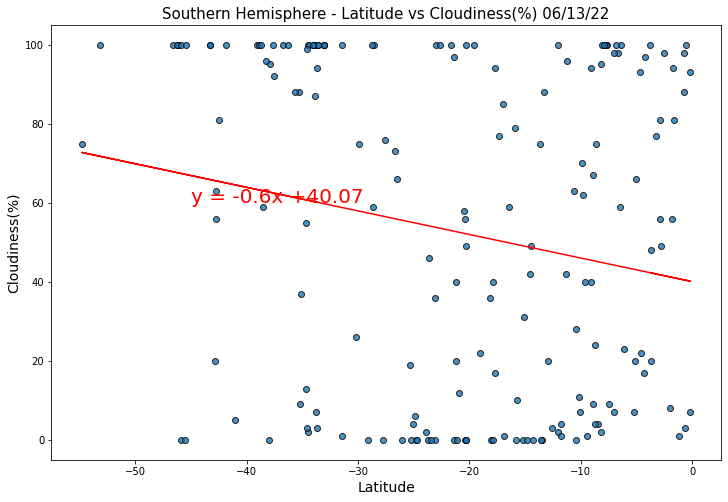

In [73]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("../output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004516852703415596
The correlation between both factors is 0.07


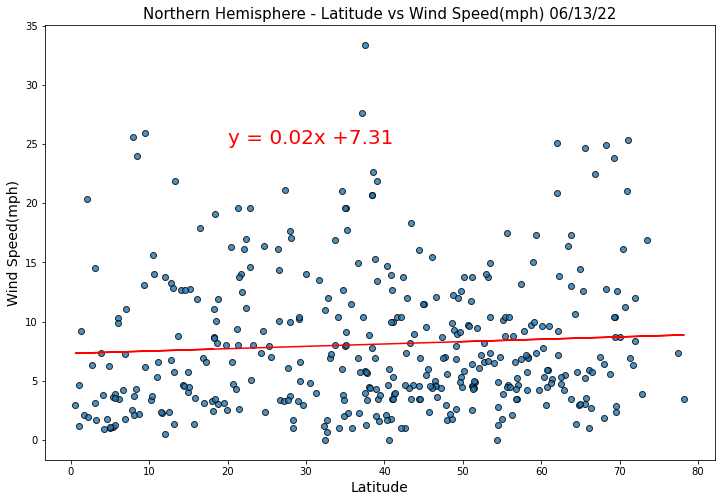

In [74]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Windspeed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed(mph)", "Northern",(20, 25))
plt.savefig("../output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0803263383244443
The correlation between both factors is -0.28


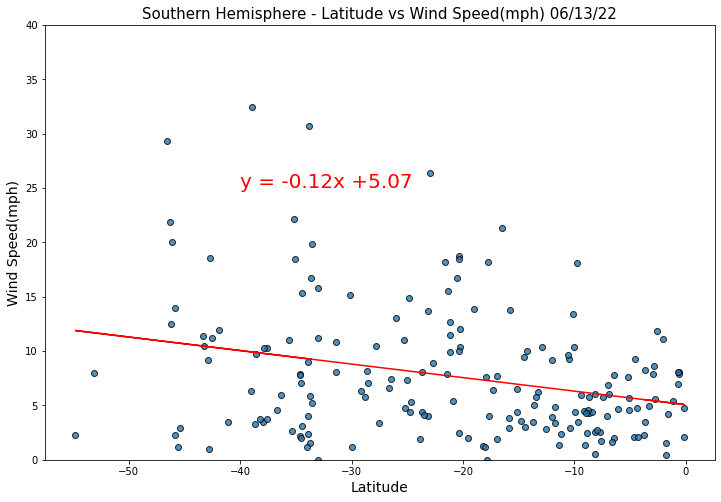

In [75]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Windspeed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed(mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("../output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()